## 1D Diffusion exercise

#### Import Statements

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
PI = math.pi

#### Object Definitions

In [119]:
class particle(object):

    def __init__(self, radius, position, ID):
        self._radius = radius
        self._position = position
        self._ID = ID

    #getters
    @property
    def radius(self):
        return self._radius

    @property
    def position(self):
        return self._position
    
    @property
    def ID(self):
        return self._ID

    #setters
    @radius.setter
    def radius(self,value):
        self._radius = value
    
    @position.setter
    def position(self,value):
        self._position=value
    
    @ID.setter
    def ID(self,value):
        self._ID=value

    #deleters
    @radius.deleter
    def radius(self):
        del self._radius
    
    @position.deleter
    def position(self):
        del self._position
    
    @ID.deleter
    def ID(self):
        del self._ID

#### Graph of 1D walk

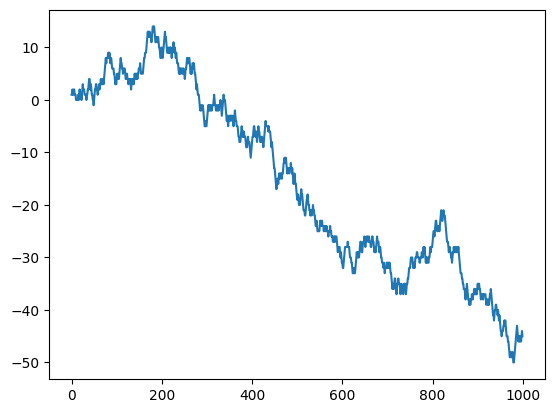

In [112]:
def step(particle):
    return particle+random.choice([-1,0,1])

def go(n):
    p=0
    l=[]
    for i in range(n):
        p=step(p)
        l.append(p)
    return l


plt.plot(go(1000))

#### Method definitions

collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision


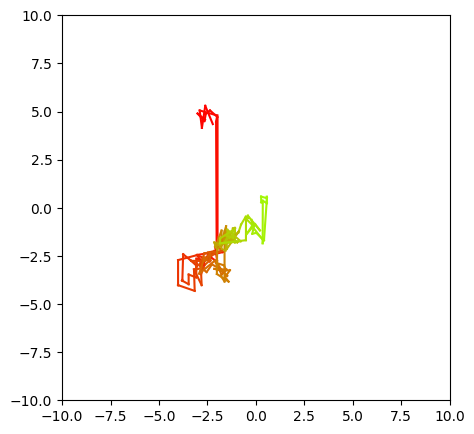

In [432]:
#moves entire list by one step; takes collisions into account
def moveParticleList(particle_list):
    for i in range(len(particle_list)):
        p1=particle_list[i]
        for j in range(i+1,len(particle_list)):
            p2=particle_list[j]
            if (math.sqrt((newParticlePos(p2)[0]-newParticlePos(p1)[0])**2+(newParticlePos(p2)[1]-newParticlePos(p1)[1])**2))<=0.5:
                v1=(p1.position[0]-newParticlePos(p1)[0])**2+(p1.position[1]-newParticlePos(p1)[1])**2
                v2=(p2.position[0]-newParticlePos(p2)[0])**2+(p2.position[1]-newParticlePos(p2)[1])**2
                s1=(p1.position[1]-newParticlePos(p1)[1])/(p1.position[0]-newParticlePos(p1)[0])
                s2=(p2.position[1]-newParticlePos(p2)[1])/(p2.position[0]-newParticlePos(p2)[0])
                theta1=math.atan(s1)
                theta2=math.atan(s2)
                anglei=theta1-theta2
                newp2d=(v1*math.sin(2*anglei)+v2*math.sin(anglei))**2
                newp1d=(v1*math.cos(2*anglei)+v2*math.cos(anglei))**2
                p2.position=(p2.position[0]+newp2d*math.sin(theta2-anglei),p2.position[0]+newp2d*math.cos(theta2-anglei))
                p1.position=(p1.position[0]+newp1d*math.cos(theta2-anglei),p1.position[0]+newp1d*math.sin(theta2-anglei))
                print("collision")
            else:
                p1.position=newParticlePos(p1)
                p2.position=newParticlePos(p1)
    

#method to change position of particle by a unit step 
def newParticlePos(particle_name):
    x=newBrownianLocation(particle_name,0.000001)[0]
    y=newBrownianLocation(particle_name,0.000001)[1]
    return ((x+10) % 20-10,(y+10) % 20-10)

#calculate what the new location would be just based off Brownian Motion
def newBrownianLocation(particle_name,dt):
    theta=random.uniform(0,2*PI)
    r=math.sqrt(160000*dt)
    dx=r*math.cos(theta)
    dy=r*math.sin(theta)

    return (particle_name.position[0]+dx,particle_name.position[1]+dy)

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n, xrange, yrange):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(xrange[0],xrange[1])
        initial_positiony = np.random.uniform(yrange[0],yrange[1])
        x=particle(2.5, (initial_positionx,initial_positiony),i)
        particle_list.append(x)

#plots particle position as a colored time series
def plotColorSpec(lx,ly):
    length=len(lx)
    t = np.arange(length)
    plt.scatter(lx,ly,c=t)
    plt.show()

def plotLineSpec(lx,ly):
    length=len(lx)
    r=0
    g=0
    b=0
    for i in range(length-1):
        r=1-(.75*i)/(2*length)
        g=i/(length)
        b=2*i/(length**2)
        plt.plot([lx[i],lx[i+1]],[ly[i],ly[i+1]],c=[r,g,b])

#create a simulation function
def simulation(steps,numparticles,xrange,yrange):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles,xrange,yrange)

    positions = []

    MP=[]
    for i in range(steps):
        moveParticleList(particle_list)
        L=[]
        for p in particle_list:
            L.append(p.position)
        MP.append(L)

    for i in range(steps):
        posix=[]
        posiy=[]
        for j in range(len(particle_list)):
            posix.append(MP[i][j][0])
            posiy.append(MP[i][j][1])
        positions.append([posix,posiy])

    for i in range(numparticles):
        lx=[]
        ly=[]
        for j in range(steps):
            lx.append(positions[j][0][i])
            ly.append(positions[j][1][i])
        plotLineSpec(lx,ly)
    
    return positions

#run the simulation and store the data in X and Y
plt.figure(figsize=(5,5))
plt.xlim([-10, 10])
plt.ylim([-10, 10])
positions = simulation(100,2,(-10,10),(-10,10))
nparticles = len(positions[0][0])



#### Animating the 2D random walk

MovieWriter ffmpeg unavailable; using Pillow instead.


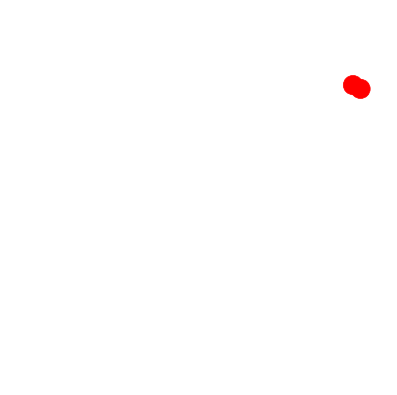

In [428]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

def animate(i):

    ax.clear()

    for j in range(nparticles):
        
        Drawing_colored_circle = plt.Circle((positions[i][0][j],positions[i][1][j]),0.5,color='red')
        ax.add_artist( Drawing_colored_circle)

    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=100,interval=1,repeat=False)

ani.save('2D.gif')

#### 1D Walk Methods and Animation

MovieWriter ffmpeg unavailable; using Pillow instead.


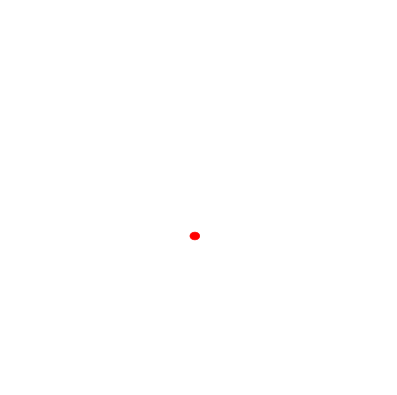

In [196]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

#method to obtain the position of a particle
def getParticlePosition(particle_name):
    return particle_name.position

#method to change position of particle by a unit step 
def moveParticle(particle_name,step):
    particle_x = getParticlePosition(particle_name)
    angle=random.uniform(1,360)
    particle_name.position = (particle_x + random.choice([-1,0,1]))

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(-1,1)
        x=particle(2.5, initial_positionx,i)
        particle_list.append(x)

#prints particle ID
def printID(particle_name):
    print(particle_name.ID)

#create a simulation function
def simulation(steps,numparticles):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles)

    positions = []
    
    for i in range(len(particle_list)):
        posix=[]
        posiy=[]
        for j in range(steps):
            moveParticle(particle_list[i],1)
            coordx = getParticlePosition(particle_list[i])
            posix.append(coordx)
        positions.append(posix)
    
    #for i in range(numparticles):
    #    plt.plot(positions[i][0],positions[i][1])
    #    plotColorSpec(positions[i][0],positions[i][1])

    x = positions[0]

    return x

#run the simulation and store the data in X and Y
x1 = simulation(1000,1)

def animate(i):

    ax.clear()

    x_pos = x1[i]

    Drawing_colored_circle = plt.Circle((x_pos,10),1,color='red')
    ax.add_artist( Drawing_colored_circle)

    plt.xlim([-40,40])
    plt.ylim([-30,70])
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=100,interval=10,repeat=False)

ani.save('1D.gif')